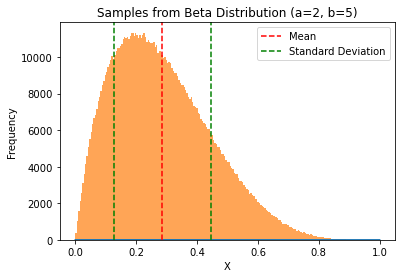

In [11]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from abc import ABC, abstractmethod
from scipy.stats import beta

class ContinuousDistribution(ABC):
    @abstractmethod
    def import_data(self, filename):
        pass
    
    @abstractmethod
    def export_data(self, filename):
        pass
    
    @abstractmethod
    def compute_mean(self):
        pass
    
    @abstractmethod
    def compute_std_dev(self):
        pass
    
    @abstractmethod
    def visualize(self):
        pass
    
    @abstractmethod
    def generate_samples(self, n_samples):
        pass

    @abstractmethod
    def drawing_samples(self):
        pass


class GaussDistribution(ContinuousDistribution):
    def __init__(self, dim=1):
        self.dim = dim
        self.data = None
        self.generated_samples = None
        self.mean = None
        self.std_dev = None

    def import_data(self, filename):
        with open(filename, 'r') as csvfile:
            csvreader = csv.reader(csvfile)
            data = []
            for i, row in enumerate(csvreader):
                if i == 0:
                    continue  # Skip first row with column headers
                x = [float(val) for val in row]
                data.append(x)

        self.data = np.array(data)

    def export_data(self, filename):
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(['x', 'y', 'z'])
            for row in self.data:
                csvwriter.writerow(row)

    def compute_mean(self):
        self.mean = np.mean(self.data, axis=0)

    def compute_std_dev(self):
        self.std_dev = np.std(self.data, axis=0)

    def visualize(self):
        self.compute_mean()
        self.compute_std_dev()

        if self.dim == 1:
            # Define parameters
            mu = self.mean  # mean values
            sigma = self.std_dev  # standard deviations

            # Create grid for x
            x = np.linspace(min(self.data), max(self.data), len(self.data))
            
            # Compute Gaussian function
            y = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x - mu)**2 / (2 * sigma**2))
            
            # Plot the Gaussian distribution
            plt.plot(x, y)
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('1D Gaussian Distribution')
            plt.show()

        elif self.dim == 2:
            # Define parameters
            mu_x, mu_y = self.mean[0], self.mean[1]  # mean values
            sigma_x, sigma_y = self.std_dev[0], self.std_dev[1]  # standard deviations

            # Create grid for x and y
            x = np.linspace(min(self.data.T[0]), max(self.data.T[0]), len(self.data.T[0]))
            y = np.linspace(min(self.data.T[1]), max(self.data.T[1]), len(self.data.T[1]))
            X, Y = np.meshgrid(x, y)

            # Compute Gaussian function
            G = np.exp(-((X - mu_x) ** 2 / (2 * sigma_x ** 2) + (Y - mu_y) ** 2 / (2 * sigma_y ** 2))) / (2 * np.pi * sigma_x * sigma_y)

            # Plot the Gaussian distribution
            fig, ax = plt.subplots()
            ax.contourf(X, Y, G)
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_title('2D Gaussian Function')
            plt.show()

        elif self.dim == 3:
            # Define parameters
            mu = np.array(self.mean)  # mean vector
            sigma = np.cov(self.data.T)  # covariance matrix

            # Create grid for x, y, z
            x = np.linspace(min(self.data.T[0]), max(self.data.T[0]), len(self.data.T[0]))
            y = np.linspace(min(self.data.T[1]), max(self.data.T[1]), len(self.data.T[1]))
            X, Y = np.meshgrid(x, y)
            
            # Compute Gaussian function
            rv = multivariate_normal(mean=mu[:2], cov=sigma[:2, :2])
            pos = np.empty(X.shape + (2,))
            pos[:, :, 0] = X
            pos[:, :, 1] = Y
            Z = rv.pdf(pos)

            # Visualize the Gaussian function
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            ax.set_title('3D Gaussian Function')
            plt.show()

    def generate_samples(self, n_samples=100):
        self.compute_mean()
        self.compute_std_dev()
        self.generated_samples = np.random.normal(loc=self.mean, scale=self.std_dev, size=(n_samples, self.mean.shape[0])) 

    def find_empirical_params(self):
        self.import_data('MGD.csv')
        self.compute_mean()
        self.compute_std_dev()

    def drawing_samples(self):
        fig = plt.figure(figsize=(10, 5))
        ax1 = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122, projection='3d')

        self.find_empirical_params()
        self.generate_samples()

        # Plotting the samples from MGD.csv file
        mu = np.array(self.mean)
        sigma = np.cov(self.data.T)
        x = np.linspace(min(self.data.T[0]), max(self.data.T[0]), len(self.data.T[0]))
        y = np.linspace(min(self.data.T[1]), max(self.data.T[1]), len(self.data.T[1]))
        X, Y = np.meshgrid(x, y)
        rv = multivariate_normal(mean=mu[:2], cov=sigma[:2, :2])
        pos = np.empty(X.shape + (2,))
        pos[:, :, 0] = X
        pos[:, :, 1] = Y
        Z = rv.pdf(pos)
        ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('Z')
        ax1.set_title('3D Gaussian Function of MGD.csv')

        # Plotting the samples generated from the learned distribution
        mu = np.array(self.mean)
        sigma = np.cov(self.generated_samples.T)
        x = np.linspace(min(self.generated_samples.T[0]), max(self.generated_samples.T[0]), len(self.generated_samples.T[0]))
        y = np.linspace(min(self.generated_samples.T[1]), max(self.generated_samples.T[1]), len(self.generated_samples.T[1]))
        X, Y = np.meshgrid(x, y)
        rv = multivariate_normal(mean=mu[:2], cov=sigma[:2, :2])
        pos = np.empty(X.shape + (2,))
        pos[:, :, 0] = X
        pos[:, :, 1] = Y
        Z = rv.pdf(pos)
        ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_zlabel('Z')
        ax2.set_title('3D Gaussian Function of sample from the learned distribution')

        plt.show()

class BetaDistribution(ContinuousDistribution):
    def __init__(self, a, b):
        self.a = a
        self.b = b
        self.data = None
        self.generated_samples = None
        self.mean = None
        self.std_dev = None
        
    def import_data(self, filename):
        with open(filename, 'r') as csvfile:
            csvreader = csv.reader(csvfile)
            data = []
            for i, row in enumerate(csvreader):
                if i == 0:
                    continue  # Skip first row with column headers
                x = [float(val) for val in row]
                data.append(x)

        self.data = np.array(data)

    def export_data(self, filename):
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(['x', 'y', 'z'])
            for row in self.data:
                csvwriter.writerow(row)
    
    def compute_mean(self):
        self.mean = beta.mean(self.a, self.b)
    
    def compute_std_dev(self):
        self.std_dev = beta.std(self.a, self.b)
    
    def visualize(self):
        self.compute_mean()
        self.compute_std_dev()
        x = np.linspace(0, 1, 100)
        y = beta.pdf(x, self.a, self.b) # y = (x ** (self.a - 1)) * ((1 - x) ** (self.b - 1)) / (beta(self.a, self.b))
        plt.plot(x, y)
        plt.axvline(x=self.mean, color='red', linestyle='--', label='Mean')
        plt.axvline(x=self.mean - self.std_dev, color='green', linestyle='--', label='Standard Deviation')
        plt.axvline(x=self.mean + self.std_dev, color='green', linestyle='--')
        plt.title('Visualization of Beta distributions')
        plt.legend()

    def generate_samples(self, n_samples=1000000):
        self.generated_samples = beta.rvs(self.a, self.b, size=n_samples)

    def drawing_samples(self):
        self.generate_samples()
        plt.hist(self.generated_samples, bins='auto', alpha=0.7)
        plt.xlabel('X')
        plt.ylabel('Frequency')
        plt.title(f'Samples from Beta Distribution (a={self.a}, b={self.b})')
        plt.show()
